# Анализ рекламных каналов онлайн-кинотеатра

##### Задача:
##### На основании данных необходимо провести анализ рекламных каналов, выявить проблемные этапы воронки продаж, дать рекомендации по изменению подходов к продажам, помочь развитию бизнеса онлайн-кинотеатра.

##### Данные о реакции людей на различные рекламные каналы собраны на разных этапах воронки продаж. Воронка состоит из пяти последовательных этапов: 

###### awareness — осведомлённость (факт показа рекламы), этот этап воронки пропущен; 
###### interest — интерес (клик по рекламному баннеру и переход на сайт);
###### consideration — рассмотрение к покупке (выбор планов подписки, хождение по продуктовым страницам);
###### intent — намерение купить (выбор плана, заявка на обратную связь, регистрация);
###### purchase — покупка.

##### Онлайн-кинотеатр отслеживает различные каналы коммуникации со своими клиентами: как органический трафик, поступающий от прямых переходов по ссылкам или из поисковой выдачи, так и рекламный трафик от баннеров и партнёрских сетей.

##### Описание каналов коммуникации:

###### banner — баннерная реклама на сайтах;
###### video — рекламные видеоролики;
###### native — нативные баннеры;
###### partner_network — реклама партнёрской сети, размещается на агрегаторах контента;
###### rich — брендирование страницы, большой баннер на весь экран;
###### search — платный поиск;
###### organic_traffic — переходы по прямым ссылкам или переходы с бесплатной поисковой выдачи на сайт.

##### Структура таблицы:

###### user_id: зашифрованный идентификатор пользователя;
###### funnel_stage: этап воронки;
###### timestamp: время совершения действия юзером;
###### profit: прибыль на этапе покупки;
###### os: операционная система, которой пользуется человек;
###### ad_channel: название рекламного канала;
###### price: затраты на рекламу.


In [ ]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats

In [171]:
df_clean_itog = pd.read_csv('df_clean_itog.csv')
df_clean_itog

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,fraud
0,364392,interest,153651,0.0,Android,video,0.75,NaN
1,614136,consideration,153651,0.0,Android,banner,0.50,NaN
2,650375,interest,153651,0.0,Android,banner,0.50,NaN
3,661919,interest,153651,0.0,Android,organic_traffic,0.00,NaN
4,12205,interest,153651,0.0,Android,organic_traffic,0.00,NaN
...,...,...,...,...,...,...,...,...
878561,752736,interest,199627,0.0,Android,video,0.75,NaN
878562,931612,consideration,199627,0.0,iOS,search,1.50,NaN
878563,925957,interest,199627,0.0,iOS,partner_network,1.00,NaN
878564,698283,interest,199627,0.0,Android,partner_network,1.00,NaN


In [172]:
# изучим данные

df = df_clean_itog.copy()
df = df.drop(columns=['fraud'], axis=1)

In [173]:
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,364392,interest,153651,0.0,Android,video,0.75
1,614136,consideration,153651,0.0,Android,banner,0.50
2,650375,interest,153651,0.0,Android,banner,0.50
3,661919,interest,153651,0.0,Android,organic_traffic,0.00
4,12205,interest,153651,0.0,Android,organic_traffic,0.00
...,...,...,...,...,...,...,...
878561,752736,interest,199627,0.0,Android,video,0.75
878562,931612,consideration,199627,0.0,iOS,search,1.50
878563,925957,interest,199627,0.0,iOS,partner_network,1.00
878564,698283,interest,199627,0.0,Android,partner_network,1.00


In [6]:
# Определим бизнес метрику, которая релевантна в данном контексте
# Метрика - доля клиентов, которые зашли через органический (бесплатный) трафик

In [7]:
# сформируем новый атрибут
# 1 - органический, 0 - платный трафик

df['organic_paid'] = df['ad_channel'].apply(lambda x: 1 if x == 'organic_traffic' else 0)

In [8]:
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid
0,364392,interest,153651,0.0,Android,video,0.75,0
1,614136,consideration,153651,0.0,Android,banner,0.50,0
2,650375,interest,153651,0.0,Android,banner,0.50,0
3,661919,interest,153651,0.0,Android,organic_traffic,0.00,1
4,12205,interest,153651,0.0,Android,organic_traffic,0.00,1
...,...,...,...,...,...,...,...,...
878561,752736,interest,199627,0.0,Android,video,0.75,0
878562,931612,consideration,199627,0.0,iOS,search,1.50,0
878563,925957,interest,199627,0.0,iOS,partner_network,1.00,0
878564,698283,interest,199627,0.0,Android,partner_network,1.00,0


In [66]:
# распределение органического и платного трафика

df['organic_paid'].value_counts()

organic_paid
0    751955
1    126611
Name: count, dtype: int64

In [9]:
# рассчитаем конверсию, метрика равна 14% для всех наблюдений

df['organic_paid'].mean()

0.14411097174258963

In [12]:
# изучим зависимость конверсии от одного фактора

In [14]:
# рассчитаем конверсию органического трафика для каждой воронки продаж

funnel_stage_conversion = df[['funnel_stage', 'organic_paid']].groupby(by='funnel_stage').mean()

In [15]:
funnel_stage_conversion

,organic_paid
funnel_stage,
consideration,0.158290
intent,0.180867
interest,0.133202
purchase,0.111628


In [16]:
# бОльшая конверсия на этапе intent, далее consideration
# для органичекого трафика стабильная конверсия на всех этапах воронки

In [17]:
# изучим конверсию для каждой системы

In [18]:
os_conversion = df[['os', 'organic_paid']].groupby(by='os').mean()

In [19]:
os_conversion

,organic_paid
os,
Android,0.164480
iOS,0.121486


In [20]:
# для органического трафика преобладают люди, предпочитающие Android, при этом люди с iOS реже используют бесплатный трафик

In [21]:
# рассчитаем конверсию для каждой выручки

In [22]:
profit_conversion = df[['profit', 'organic_paid']].groupby(by='profit').mean()

In [23]:
profit_conversion

,organic_paid
profit,
0.0,0.144263
50.0,0.126437
130.0,0.126010
260.0,0.107093
520.0,0.107093
1099.0,0.114641
2136.0,0.092086


In [24]:
# люди, пришедшие через органический трафик - конверсия без выгоды 14%, конверсия органич. трафика с выгодой от 9 до 12%

In [26]:
# конверсия людей органического трафика с os и profit

os_profit_conv = df[['os', 'profit', 'organic_paid']].groupby(by=['os', 'profit']).mean()
os_profit_conv

organic_paid
os      profit              
Android 0.0         0.164615
        50.0        0.135531
        130.0       0.160142
        260.0       0.099715
        520.0       0.129412
        1099.0      0.147826
        2136.0      0.124611
iOS     0.0         0.121631
        50.0        0.119048
        130.0       0.097633
        260.0       0.114130
        520.0       0.087071
        1099.0      0.084433
        2136.0      0.064171

In [ ]:
# Конверсия у Android по самому высокому profit (2136) в два раза выше, чем по iOS; 
# Конверсия по 1099 и 520 тоже выше у Android

In [27]:
# конверсия людей органич трафика в зависимости от этапа воронки и системы

fs_os_conv = df[['funnel_stage', 'os', 'organic_paid']].groupby(by=['funnel_stage', 'os']).mean()
fs_os_conv

organic_paid
funnel_stage  os                   
consideration Android      0.179749
              iOS          0.134190
intent        Android      0.225732
              iOS          0.138372
interest      Android      0.151293
              iOS          0.112932
purchase      Android      0.131868
              iOS          0.093836

In [28]:
fs_os_conv.reset_index().pivot(index='funnel_stage', columns='os')

organic_paid          
os                 Android       iOS
funnel_stage                        
consideration     0.179749  0.134190
intent            0.225732  0.138372
interest          0.151293  0.112932
purchase          0.131868  0.093836

In [29]:
# в целом конверсия по Android на всех этапах воронки выше, чем по iOS
# на этапе воронки intent (намерение купить) с Android самый высокий показатель конверсии около 22% для людей, 
# предпочитающих органич трафик

# на этапе воронки consideration (рассмотрение к покупке) c Android конверсия на уровне 18%

# эти группы людей предпочитают органический (бесплатный) трафик помимо всех прочих

In [30]:
# Помимо конверсии важно оценить долю, которую выделенные в гипотезах группы людей, составляют среди всех клиентов

In [31]:
# сделаем "ones" для суммирования числа наблюдений по различным группам

df['ones'] = 1

fs_os_number = df[['funnel_stage', 'os', 'ones']].groupby(by=['funnel_stage', 'os']).sum()
fs_os_number

ones
funnel_stage  os             
consideration Android  160318
              iOS      142753
intent        Android   21118
              iOS       22295
interest      Android  278989
              iOS      249008
purchase      Android    1911
              iOS        2174

In [32]:
fs_os_number.reset_index().pivot(index='funnel_stage', columns='os')

ones        
os            Android     iOS
funnel_stage                 
consideration  160318  142753
intent          21118   22295
interest       278989  249008
purchase         1911    2174

In [33]:
# группа (доля) intent 2% от всей выборки значительно меньше группы consideration 18% от всей выборки, 
# если кампания проводилась для случайного подмножества клиентов, 
# то в первую очередь стоит обратить внимание на группу consideration - Android 

In [34]:
df.shape

(878566, 9)

In [ ]:
# Две серии наблюдений, биномиальный критерий для проверки гипотезы о равенстве долей/вероятностей

# А - Конверсия в intent (намерение купить) 0,22% при выборке в 21118 человек
# B - Конверсия в consideration (рассмотрение к покупке ) 0,17% при выборке в 160318 человек

# Определим является ли преимущество варианта А значимым

In [109]:
n1 = 21118
m1 = 4645
n2 = 160318
m2 = 27254

In [110]:
T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1 + 1/n2))**0.5
P = 1 - st.norm.cdf(T)
print('Statistic: ', T, ', p-value: ', P)

Statistic:  17.926463824317917 , p-value:  0.0


In [111]:
# p-value мало, на уровне значимости 0.05 основная гипотеза, что вероятности равны и нет значимой разницы между А и B отвергается
# вариант А с точки зрения вероятности лучше варианта B, конверсия в "намерение купить" (для варианта А) выше

In [ ]:
# определим функцию, которая считает этапы воронки

In [112]:
def interest_count(series):
    i = filter(lambda x:  x == 'interest', series)
    lst = list(i)
    return lst.count('interest')

In [113]:
def consideration_count(series):
    i = filter(lambda x:  x == 'consideration', series)
    lst = list(i)
    return lst.count('consideration')

In [114]:
def intent_count(series):
    i = filter(lambda x:  x == 'intent', series)
    lst = list(i)
    return lst.count('intent')

In [115]:
def purchase_count(series):
    i = filter(lambda x:  x == 'purchase', series)
    lst = list(i)
    return lst.count('purchase')

In [116]:
# этапы воронки по платным и бесплатным каналам (1 бесплатный, 0 платный)

df_org_paid = df.groupby('organic_paid', as_index=False).agg(interest=('funnel_stage', interest_count),
                                                       consideration=('funnel_stage', consideration_count),
                                                       intent=('funnel_stage', intent_count),
                                                       purchase=('funnel_stage', purchase_count))

In [117]:
df_org_paid

,organic_paid,interest,consideration,intent,purchase
0,0,457667,255098,35561,3629
1,1,70330,47973,7852,456


In [41]:
df_org_paid['CR_cons'], df_org_paid['CR_intent'], df_org_paid['CR_purchase'] = df_org_paid['consideration'] / df_org_paid['interest'], df_org_paid['intent'] / df_org_paid['consideration'], df_org_paid['purchase'] / df_org_paid['intent'] 

In [42]:
df_org_paid

,organic_paid,interest,consideration,intent,purchase,CR_cons,CR_intent,CR_purchase
0,0,457667,255098,35561,3629,0.557388,0.139401,0.102050
1,1,70330,47973,7852,456,0.682113,0.163675,0.058074


In [43]:
# По органическому трафику конверсия на этапах consideration и intent лучше, чем по платному трафику
# Конверсия в покупку выше у платного трафика

In [44]:
# Посчитаем воронки для каждого канала коммуникации и выявим лучший и худший каналы по данным 
# на этапах consideration, intent, purchase

In [118]:
# этапы воронки по всем каналам

df_counts = df.groupby('ad_channel', as_index=False).agg(interest=('funnel_stage', interest_count),
                                                       consideration=('funnel_stage', consideration_count),
                                                       intent=('funnel_stage', intent_count),
                                                       purchase=('funnel_stage', purchase_count))

In [119]:
df_counts

,ad_channel,interest,consideration,intent,purchase
0,banner,82745,42566,6575,604
1,native,17448,11340,358,34
2,organic_traffic,70330,47973,7852,456
3,partner_network,60025,22185,3854,392
4,rich,8032,4175,1066,22
5,search,201376,120019,23654,2573
6,video,88041,54813,54,4


In [120]:
df_counts['CR_click_to_cons'], df_counts['CR_consideration_to_intent'], df_counts['CR_intent_to_purchase'] = df_counts['consideration'] / df_counts['interest'], df_counts['intent'] / df_counts['consideration'], df_counts['purchase'] / df_counts['intent'] 
                                                    
df_counts

,ad_channel,interest,consideration,intent,purchase,CR_click_to_cons,CR_consideration_to_intent,CR_intent_to_purchase
0,banner,82745,42566,6575,604,0.514424,0.154466,0.091863
1,native,17448,11340,358,34,0.649931,0.031570,0.094972
2,organic_traffic,70330,47973,7852,456,0.682113,0.163675,0.058074
3,partner_network,60025,22185,3854,392,0.369596,0.173721,0.101713
4,rich,8032,4175,1066,22,0.519796,0.255329,0.020638
5,search,201376,120019,23654,2573,0.595995,0.197085,0.108777
6,video,88041,54813,54,4,0.622585,0.000985,0.074074


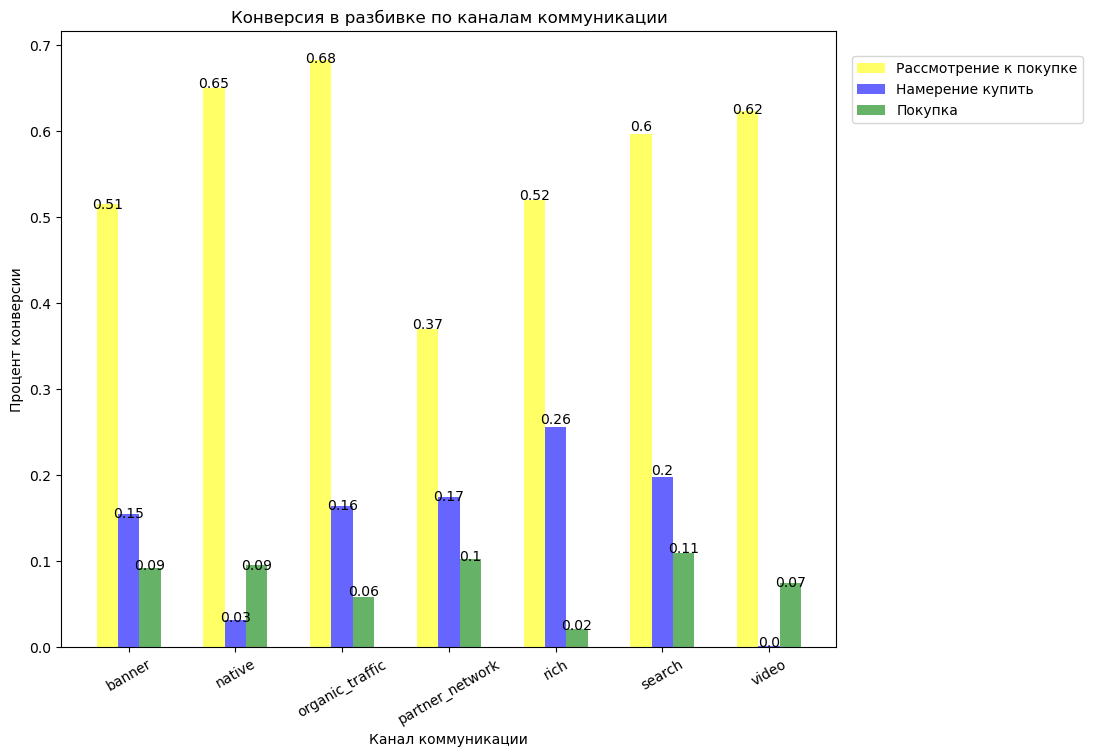

In [121]:
ad_channel = df_counts.ad_channel
CR_consideration = df_counts.CR_click_to_cons
CR_intent = df_counts.CR_consideration_to_intent
CR_purchase = df_counts.CR_intent_to_purchase

bar_width = 0.2
index = np.arange(len(ad_channel))

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(index, CR_consideration, bar_width, color='yellow', alpha=0.6, label='Рассмотрение к покупке')
ax.bar(index + bar_width, CR_intent, bar_width, color='blue', alpha=0.6, label='Намерение купить')
ax.bar(index + 2 * bar_width, CR_purchase, bar_width, color='green', alpha=0.6, label='Покупка')

ax.set_xlabel('Канал коммуникации')
ax.set_ylabel('Процент конверсии')
ax.set_title('Конверсия в разбивке по каналам коммуникации')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(ad_channel)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc=(1.02, 0.85))

for i, val in enumerate(CR_consideration):
    val = round(val, 2)
    plt.text(i, val, str(val), ha='center')
    
for i, val in enumerate(CR_intent):
    val = round(val, 2)
    plt.text(i+bar_width, val, str(val), ha='center')
    
for i, val in enumerate(CR_purchase):
    val = round(val, 2)
    plt.text(i + 2 * bar_width, val, str(val), ha='center')    
    
plt.show()

In [49]:
# consideration (рассмотрение к покупке) лучший канал - organic_traffic, худший - partner_network
# intent (намерение купить) лучший канал - rich, худший - video
# purchase (покупка) лучший канал - search, худший - rich

In [51]:
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones
0,364392,interest,153651,0.0,Android,video,0.75,0,1
1,614136,consideration,153651,0.0,Android,banner,0.50,0,1
2,650375,interest,153651,0.0,Android,banner,0.50,0,1
3,661919,interest,153651,0.0,Android,organic_traffic,0.00,1,1
4,12205,interest,153651,0.0,Android,organic_traffic,0.00,1,1
...,...,...,...,...,...,...,...,...,...
878561,752736,interest,199627,0.0,Android,video,0.75,0,1
878562,931612,consideration,199627,0.0,iOS,search,1.50,0,1
878563,925957,interest,199627,0.0,iOS,partner_network,1.00,0,1
878564,698283,interest,199627,0.0,Android,partner_network,1.00,0,1


In [52]:

df.profit.value_counts()

profit
0.0       874481
1099.0       724
520.0        719
260.0        719
2136.0       695
130.0        619
50.0         609
Name: count, dtype: int64

In [ ]:
# Цель любого бизнеса - получение прибыли, сравним два самых низко прибыльных канала rich и video

In [122]:
# выделим целевую переменную (1 - есть прибыль, 0 - нет прибыли)

df['target_profit'] = df['profit'].apply(lambda x: 1 if x != 0 else 0)

In [123]:
df[:2]

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones,target_profit
0,364392,interest,153651,0.0,Android,video,0.75,0,1,0
1,614136,consideration,153651,0.0,Android,banner,0.50,0,1,0


In [124]:
df.target_profit.value_counts()

target_profit
0    874481
1      4085
Name: count, dtype: int64

In [125]:
# определим функцию, которая считает нули

def count_zero(Series):
    zero = filter(lambda x: x == 0, Series)
    lst = list(zero)
    return lst.count(0)

In [126]:
# определим функцию, которая считает единицы

def count_ones(Series):
    ones = filter(lambda x: x == 1, Series)
    lst = list(ones)
    return lst.count(1)

In [127]:
count_zero(df['target_profit'])

874481

In [128]:
count_ones(df['target_profit'])

4085

In [129]:
df_rich_video = df[(df['ad_channel'] == 'rich') | (df['ad_channel'] == 'video')]
df_rich_video

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones,target_profit
0,364392,interest,153651,0.0,Android,video,0.75,0,1,0
13,429133,consideration,153652,0.0,Android,video,0.75,0,1,0
20,329342,interest,153652,0.0,Android,video,0.75,0,1,0
21,504883,interest,153652,0.0,Android,video,0.75,0,1,0
22,362286,interest,153652,0.0,Android,video,0.75,0,1,0
...,...,...,...,...,...,...,...,...,...,...
878525,355685,consideration,199626,0.0,Android,video,0.75,0,1,0
878526,241287,interest,199626,0.0,iOS,video,0.75,0,1,0
878545,6667,consideration,199626,0.0,Android,video,0.75,0,1,0
878559,863006,interest,199627,0.0,Android,video,0.75,0,1,0


In [130]:
df_rich_video['target_profit'].value_counts()

target_profit
0    156181
1        26
Name: count, dtype: int64

In [131]:
# выделим два канала только с целевым действием - прибыль

df_both = df_rich_video[df_rich_video['target_profit'] == 1]
df_both

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones,target_profit
96274,968214,purchase,159439,1099.0,iOS,rich,2.50,0,1,1
152869,652518,purchase,162406,2136.0,iOS,rich,2.50,0,1,1
165996,987545,purchase,163088,1099.0,iOS,rich,2.50,0,1,1
167173,741041,purchase,163148,2136.0,iOS,rich,2.50,0,1,1
191263,883938,purchase,164403,50.0,iOS,video,0.75,0,1,1
202824,918068,purchase,165006,1099.0,iOS,rich,2.50,0,1,1
226452,447553,purchase,166228,1099.0,Android,rich,2.50,0,1,1
241515,1048575,purchase,167003,1099.0,iOS,rich,2.50,0,1,1
262470,968214,purchase,168075,2136.0,Android,video,0.75,0,1,1
303421,738617,purchase,170187,1099.0,iOS,rich,2.50,0,1,1


In [132]:
# rich - 1, video - 0

df_both['rich_1_video_0'] = df_both['ad_channel'].apply(lambda x: 1 if x == 'rich' else 0)

C:\Users\Julia\AppData\Local\Temp\ipykernel_12436\3538388746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both['rich_1_video_0'] = df_both['ad_channel'].apply(lambda x: 1 if x == 'rich' else 0)


In [133]:
df_both

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones,target_profit,rich_1_video_0
96274,968214,purchase,159439,1099.0,iOS,rich,2.50,0,1,1,1
152869,652518,purchase,162406,2136.0,iOS,rich,2.50,0,1,1,1
165996,987545,purchase,163088,1099.0,iOS,rich,2.50,0,1,1,1
167173,741041,purchase,163148,2136.0,iOS,rich,2.50,0,1,1,1
191263,883938,purchase,164403,50.0,iOS,video,0.75,0,1,1,0
202824,918068,purchase,165006,1099.0,iOS,rich,2.50,0,1,1,1
226452,447553,purchase,166228,1099.0,Android,rich,2.50,0,1,1,1
241515,1048575,purchase,167003,1099.0,iOS,rich,2.50,0,1,1,1
262470,968214,purchase,168075,2136.0,Android,video,0.75,0,1,1,0
303421,738617,purchase,170187,1099.0,iOS,rich,2.50,0,1,1,1


In [134]:
# получаем две выборки по двум каналам
# H0 Основная гипотеза: пользователи канала video совершают покупку так же, как пользователи rich нет отличий (распределения равны)
# H1 Альтернативная гипотеза: пользователи канала video совершают меньше покупок, чем по каналу rich (One-tailed test)

df_itog = df_both.groupby(['timestamp'], as_index=False).agg({'rich_1_video_0': [count_zero, count_ones]})
df_itog = df_itog.rename(columns=({'count_zero': 'video', 'count_ones': 'rich'}))
df_itog

timestamp rich_1_video_0     
                      video rich
0     159439              0    1
1     162406              0    1
2     163088              0    1
3     163148              0    1
4     164403              1    0
5     165006              0    1
6     166228              0    1
7     167003              0    1
8     168075              1    0
9     170187              0    1
10    173782              0    1
11    173932              0    1
12    175440              0    1
13    176485              0    1
14    179420              1    0
15    182761              1    0
16    182920              0    1
17    185101              0    1
18    187109              0    1
19    187209              0    1
20    187831              0    1
21    188433              0    1
22    189171              0    1
23    190358              0    1
24    194541              0    1
25    194656              0    1

In [137]:
# проверим гипотезу о нормальности данных (распределения) с помощью теста Шапиро-Уилка

stats.shapiro(df_itog['rich_1_video_0']['video'])

ShapiroResult(statistic=0.4358135461807251, pvalue=6.032056187876833e-09)

In [138]:
stats.shapiro(df_itog['rich_1_video_0']['rich'])

ShapiroResult(statistic=0.435813844203949, pvalue=6.032089938656782e-09)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%) отвергаем нулевую гипотезу о том, что данные распределены нормально

In [143]:
# выборки не подчиняются нормальному распределению, независимы (два разных канала коммуникации)
# Статистический критерий Манна-Уитни

stats.mannwhitneyu(df_itog['rich_1_video_0']['video'], df_itog['rich_1_video_0']['rich'], alternative='less')

MannwhitneyuResult(statistic=104.0, pvalue=4.03841917628116e-07)

In [ ]:
# pvalue очень мало (меньше уровня значимости 5%), значит отвергаем нулевую гипотезу H0 (что между каналами video и rich нет отличий)
# и принимаем альтернативную гипотезу H1 - пользователи канала video совершают меньше покупок, чем по каналу rich

In [145]:
df[:2]

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,organic_paid,ones,target_profit
0,364392,interest,153651,0.0,Android,video,0.75,0,1,0
1,614136,consideration,153651,0.0,Android,banner,0.50,0,1,0


In [146]:
df[['ad_channel', 'profit']].groupby(['ad_channel']).agg({'profit': 'sum'})

,profit
ad_channel,
banner,436935.0
native,33600.0
organic_traffic,301971.0
partner_network,386424.0
rich,33511.0
search,1757049.0
video,2446.0


In [148]:
df['profit'].sum()

2951936.0

In [ ]:
# Дополнительно, если по каналу video и rich сравнивать конверсию из этапа interest — интерес в этап purchase — покупка, то
# вариант А лучше варианта B

In [156]:
# вариант A - rich
n1 = 8032
m1 = 22

# Вариант B - video
n2 = 88041
m2 = 4


In [157]:
T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1 + 1/n2))**0.5
P = 1 - st.norm.cdf(T)
print('Statistic: ', T, ', p-value: ', P)

Statistic:  14.049511400619071 , p-value:  0.0


In [158]:
# p-value мало, на уровне значимости 0.05 основная гипотеза, что вероятности равны и нет значимой разницы между А и B отвергается
# вариант А лучше варианта B, конверсия в покупку для варианта А rich выше

In [ ]:
# Исходя из результатов, канал коммуникации (претендент на отключение) - это канал VIDEO, 
# т.к. этот канал приносит менее всего прибыли и самый низкий с точки зрения конверсии из этапа - интерес в этап - покупка

# Рекомендация рассмотреть развитие канала banner, 
# т.к. по каналу banner стабильная конверсия на всех этапах воронки и price (затраты) banner=0.5 (дешевле, чем price video=0.75)
# Также канал banner на втором месте по прибыли среди всех каналов коммуникации

In [176]:
df[['ad_channel', 'profit']].groupby(['ad_channel']).agg({'profit': 'sum'}).sort_values('profit', ascending=False)

,profit
ad_channel,
search,1757049.0
banner,436935.0
partner_network,386424.0
organic_traffic,301971.0
native,33600.0
rich,33511.0
video,2446.0
